### =======================================================================
### IMPORTACIÓN DE DATOS.
### =======================================================================

In [14]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sys

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', 1000)
np.set_printoptions(threshold=sys.maxsize)

In [15]:
# LECTURAS DE CSV YA PROCESADOS.
train = pd.read_csv('DATA/trainProcesado_precio.csv')
test = pd.read_csv('DATA/testProcesado.csv')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 19 columns):
id                            240000 non-null int64
antiguedad                    240000 non-null int64
habitaciones                  240000 non-null int64
garages                       240000 non-null int64
banos                         240000 non-null int64
metroscubiertos               240000 non-null int64
metrostotales                 240000 non-null int64
gimnasio                      240000 non-null int64
usosmultiples                 240000 non-null int64
piscina                       240000 non-null int64
escuelascercanas              240000 non-null int64
centroscomercialescercanos    240000 non-null int64
anio                          240000 non-null int64
precio                        240000 non-null float64
ciudad                        240000 non-null int64
provincia                     240000 non-null int64
tipodepropiedad               240000 non-null int64
tit

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 18 columns):
id                            60000 non-null int64
antiguedad                    60000 non-null int64
habitaciones                  60000 non-null int64
garages                       60000 non-null int64
banos                         60000 non-null int64
metroscubiertos               60000 non-null int64
metrostotales                 60000 non-null int64
gimnasio                      60000 non-null int64
usosmultiples                 60000 non-null int64
piscina                       60000 non-null int64
escuelascercanas              60000 non-null int64
centroscomercialescercanos    60000 non-null int64
anio                          60000 non-null int64
ciudad                        60000 non-null int64
provincia                     60000 non-null int64
tipodepropiedad               60000 non-null int64
titulo_features_enc           60000 non-null int64
descripcion_features_enc

### =======================================================================
### ENTRENAMIENTO Y PREDICCIÓN.
### =======================================================================

In [18]:
# Resto de los labels.
Y = np.array(train['precio'])
X = train.drop('precio', axis = 1)

In [19]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=4)

In [28]:
###############################################################################
## APLICANDO KNN.
###############################################################################

k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainX, trainY)
    predY = knn.predict(testX)
    scores[k] = metrics.accuracy_score(testY,predY)
    scores_list.append(metrics.accuracy_score(testY,predY))

###############################################################################

Text(0, 0.5, 'Testing Accuracy')

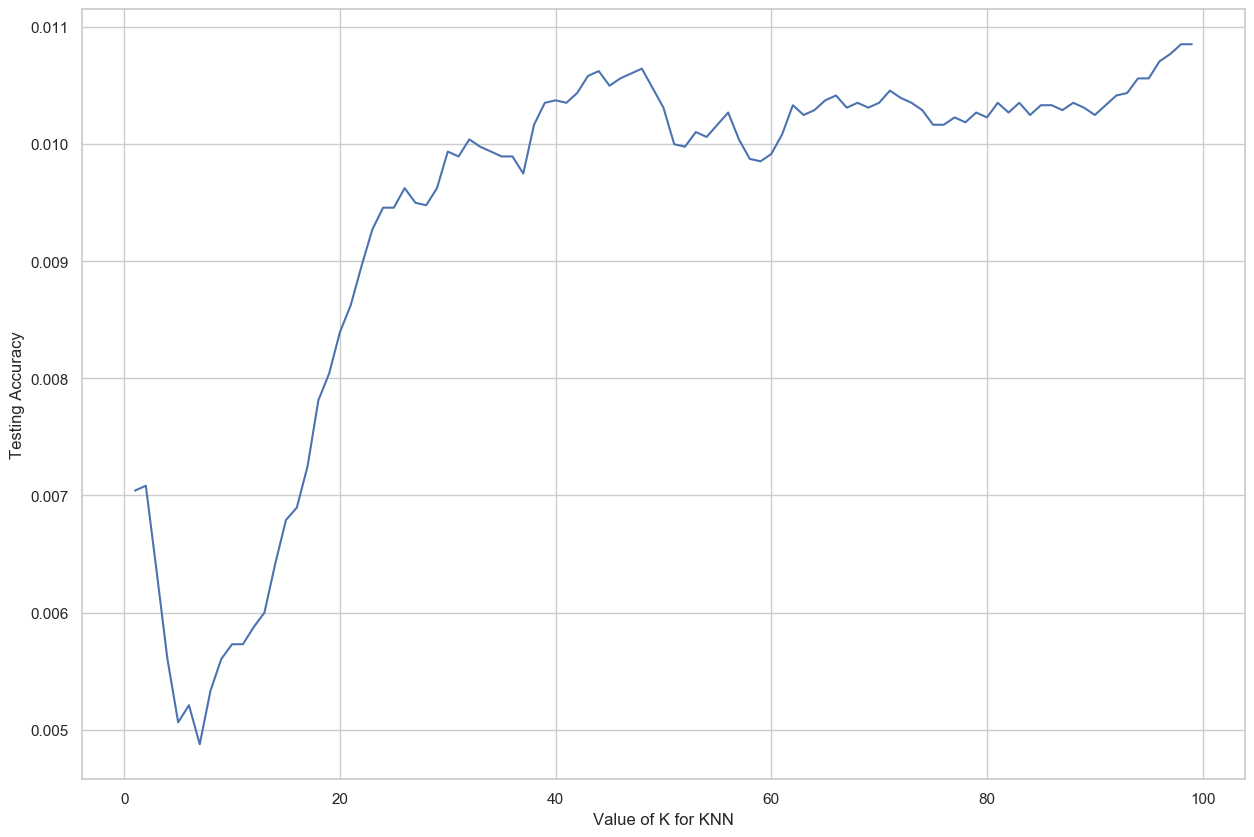

In [29]:
#Plot the relationship between the values of K and the corresponding testing accuracy using the matplotlib library.
#In general as the value of K increase there appears to be a raise in the accuracy and again it falls.
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [26]:
#In general the Training accuracy rises as the model complexity increases, for KNN the model complexity is determined by the value of K.
#Larger K value leads to smoother decision boundary (less complex model). Smaller K leads to more complex model (may lead to overfitting)
#Elejimos k = 42
knn_final = KNeighborsClassifier(n_neighbors=42)
knn_final.fit(X, Y)
prediccion = knn_final.predict(test)

In [27]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': test['id'], 'target': prediccion })
submission.to_csv("SUBMITS/001_G34_KNN.csv", index=False)